In [37]:
%matplotlib inline

In [32]:
# imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

In [142]:
# global parameters
N_POINTS = 200
SEED_START = 100
SEED_SIZE = 5
N_TIMES = 100000
TIME_STEP = 0.1
N_STEPS = 10000
DA = 1.0
DB = 0.5
f = 0.055
k = 0.062

In [143]:
# initialize starting conditions
a = np.ones((N_POINTS, N_POINTS))
b = np.zeros((N_POINTS, N_POINTS))
b[SEED_START:SEED_START+SEED_SIZE, SEED_START:SEED_START+SEED_SIZE] = 1.0
evolution = [[a,b]]

In [144]:
# calculate for each time step
with tf.Session() as sess:
    # create input and constant nodes
    kernel = tf.constant([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=tf.float32)
    kernel = tf.reshape(kernel, [3, 3, 1, 1])
    kernel_a = DA * TIME_STEP * kernel
    kernel_b = DB * TIME_STEP * kernel
    current_a = tf.placeholder(tf.float32, shape=[N_POINTS, N_POINTS])
    current_b = tf.placeholder(tf.float32, shape=[N_POINTS, N_POINTS])
    tf.global_variables_initializer().run()
    
    # create calculation nodes
    input_a = tf.reshape(current_a, [1, N_POINTS, N_POINTS, 1])
    input_b = tf.reshape(current_b, [1, N_POINTS, N_POINTS, 1])
    diff_a = tf.nn.conv2d(input_a, kernel_a, strides=[1,1,1,1], padding='SAME')
    diff_b = tf.nn.conv2d(input_b, kernel_b, strides=[1,1,1,1], padding='SAME')
    react_a = TIME_STEP * (-input_a*input_b*input_b + f*(1.0 - input_a))
    react_b = TIME_STEP * (input_a*input_b*input_b - (k+f)*input_b)
    next_a = input_a + diff_a + react_a
    next_b = input_b + diff_b + react_b
    next_a = tf.reshape(next_a, [N_POINTS, N_POINTS])
    next_b = tf.reshape(next_b, [N_POINTS, N_POINTS])

    # calculate for each time step
    for i in tqdm(range(N_TIMES)):
        feed_dict = {current_a: a, current_b: b}
        new_a, new_b = sess.run([next_a, next_b], feed_dict=feed_dict)

        if (i+1)%N_STEPS==0:
            evolution.append([new_a, new_b])
        a = new_a
        b = new_b

100%|██████████| 100000/100000 [00:49<00:00, 2026.79it/s]


In [145]:
# cast evolution to a numpy array
evolution = np.array(evolution)

In [146]:
last_a = evolution[-1, 0, :, :]
last_b = evolution[-1, 1, :, :]

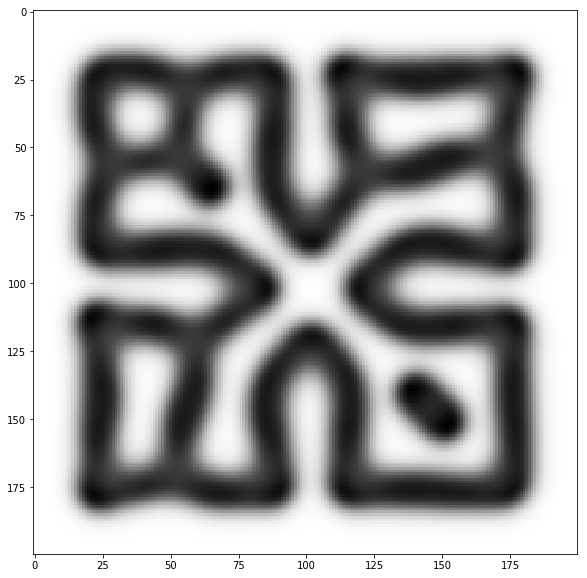

In [156]:
b_list = evolution[:, 1, :, :]
plt.figure(figsize=(10,10))
plt.imshow(b_list[8,:, :], cmap='binary')